**This notebook is an exercise in the [Computer Vision](https://www.kaggle.com/learn/computer-vision) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/the-sliding-window).**

---


# Introduction #

In these exercises, you'll explore the operations a couple of popular convnet architectures use for feature extraction, learn about how convnets can capture large-scale visual features through stacking layers, and finally see how convolution can be used on one-dimensional data, in this case, a time series.

Run the cell below to set everything up.

In [1]:
# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.computer_vision.ex4 import *

import tensorflow as tf
import matplotlib.pyplot as plt
import learntools.computer_vision.visiontools as visiontools


plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

# (Optional) Experimenting with Feature Extraction #

This exercise is meant to give you an opportunity to explore the sliding window computations and how their parameters affect feature extraction. There aren't any right or wrong answers -- it's just a chance to experiment!

We've provided you with some images and kernels you can use. Run this cell to see them.

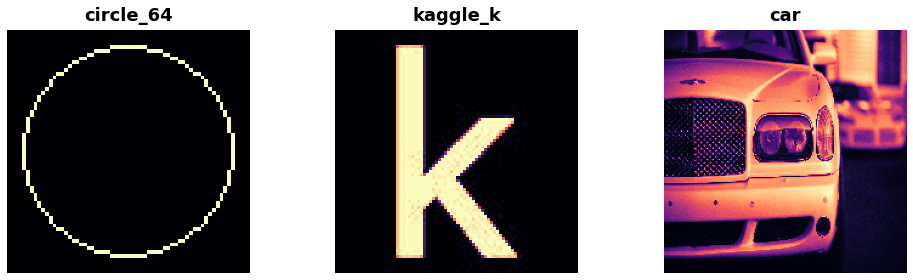

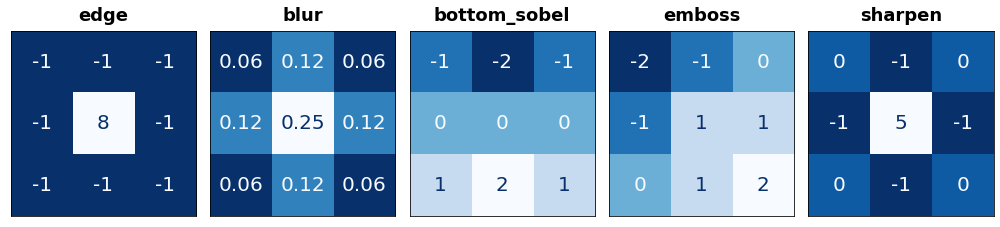

In [2]:
from learntools.computer_vision.visiontools import edge, blur, bottom_sobel, emboss, sharpen, circle

image_dir = '../input/computer-vision-resources/'
circle_64 = tf.expand_dims(circle([64, 64], val=1.0, r_shrink=4), axis=-1)
kaggle_k = visiontools.read_image(image_dir + str('k.jpg'), channels=1)
car = visiontools.read_image(image_dir + str('car_illus.jpg'), channels=1)
car = tf.image.resize(car, size=[200, 200])
images = [(circle_64, "circle_64"), (kaggle_k, "kaggle_k"), (car, "car")]

plt.figure(figsize=(14, 4))
for i, (img, title) in enumerate(images):
    plt.subplot(1, len(images), i+1)
    plt.imshow(tf.squeeze(img))
    plt.axis('off')
    plt.title(title)
plt.show();

kernels = [(edge, "edge"), (blur, "blur"), (bottom_sobel, "bottom_sobel"),
           (emboss, "emboss"), (sharpen, "sharpen")]
plt.figure(figsize=(14, 4))
for i, (krn, title) in enumerate(kernels):
    plt.subplot(1, len(kernels), i+1)
    visiontools.show_kernel(krn, digits=2, text_size=20)
    plt.title(title)
plt.show()

To choose one to experiment with, just enter it's name in the appropriate place below. Then, set the parameters for the window computation. Try out some different combinations and see what they do!

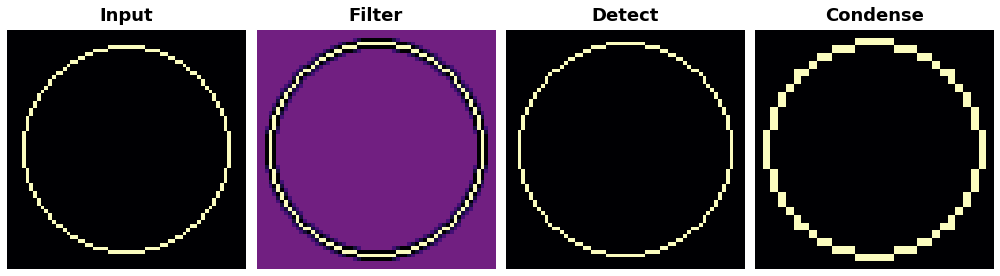

In [9]:
# YOUR CODE HERE: choose an image
image = circle_64

# YOUR CODE HERE: choose a kernel
kernel = edge

visiontools.show_extraction(
    image, kernel,

    # YOUR CODE HERE: set parameters
    conv_stride=1,
    conv_padding='valid',
    pool_size=2,
    pool_stride=2,
    pool_padding='valid',
    
    subplot_shape=(1, 4),
    figsize=(14, 6),
)

# The Receptive Field #

Trace back all the connections from some neuron and eventually you reach the input image. All of the input pixels a neuron is connected to is that neuron's **receptive field**. The receptive field just tells you which parts of the input image a neuron receives information from.

As we've seen, if your first layer is a convolution with $3 \times 3$ kernels, then each neuron in that layer gets input from a $3 \times 3$ patch of pixels (except maybe at the border).

What happens if you add another convolutional layer with $3 \times 3$ kernels? Consider this next illustration:

<figure>
<img src="https://i.imgur.com/HmwQm2S.png" alt="Illustration of the receptive field of two stacked convolutions." width=250>
</figure>

Now trace back the connections from the neuron at top and you can see that it's connected to a $5 \times 5$ patch of pixels in the input (the bottom layer): each neuron in the $3 \times 3$ patch in the middle layer is connected to a $3 \times 3$ input patch, but they overlap in a $5 \times 5$ patch. So that neuron at top has a $5 \times 5$ receptive field.

# 1) Growing the Receptive Field #

Now, if you added a *third* convolutional layer with a `(3, 3)` kernel, what receptive field would its neurons have? Run the cell below for an answer. (Or see a hint first!)

In [10]:
# View the solution (Run this code cell to receive credit!)
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The third layer would have a $7 \times 7$ receptive field.

So why stack layers like this? Three `(3, 3)` kernels have 27 parameters, while one `(7, 7)` kernel has 49, though they both create the same receptive field. This stacking-layers trick is one of the ways convnets are able to create large receptive fields without increasing the number of parameters too much. You'll see how to do this yourself in the next lesson!